In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

15

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.52468 stdev: 0.08998
Best fitness: 0.71923 - size: (2, 13) - species 6 - id 119
Average adjusted fitness: 0.224
Mean genetic distance 2.893, standard deviation 0.485
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 9.906 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56237 stdev: 0.09197
Best fitness: 0.76747 - size: (3, 15) - species 22 - id 377
Average adjusted fitness: 0.231
Mean genetic distance 2.989, standard deviation 0.499
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 12.130 sec (11.018 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58264 stdev: 0.08711
Best fitness: 0.76747 - size: (3, 15) - species 22 - id 377
Average adjusted fitness: 0.224
Mean genetic distance 2.974, standard deviation 0.495
Population of 203 members in 30 species
Total extin

Population's average fitness: 0.63643 stdev: 0.09958
Best fitness: 0.78912 - size: (8, 28) - species 4 - id 3571
Average adjusted fitness: 0.280
Mean genetic distance 3.251, standard deviation 0.521
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 37.069 sec (29.904 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63441 stdev: 0.09438
Best fitness: 0.78912 - size: (8, 28) - species 4 - id 3571
Average adjusted fitness: 0.297
Mean genetic distance 3.281, standard deviation 0.528
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 39.116 sec (31.636 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63198 stdev: 0.09402
Best fitness: 0.78912 - size: (8, 28) - species 4 - id 3571
Average adjusted fitness: 0.359
Mean genetic distance 3.304, standard deviation 0.534
Population of 205 members in 24 species
Total extinctions: 0
Generation time: 39.692 sec (32.789 average)

 ***

Population's average fitness: 0.62816 stdev: 0.10796
Best fitness: 0.79654 - size: (7, 22) - species 25 - id 1595
Average adjusted fitness: 0.301
Mean genetic distance 3.175, standard deviation 0.474
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 40.286 sec (44.092 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62344 stdev: 0.10647
Best fitness: 0.79654 - size: (7, 22) - species 25 - id 1595
Average adjusted fitness: 0.272
Mean genetic distance 3.164, standard deviation 0.483
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 40.410 sec (44.027 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63312 stdev: 0.10509
Best fitness: 0.79654 - size: (7, 22) - species 25 - id 1595
Average adjusted fitness: 0.255
Mean genetic distance 3.148, standard deviation 0.489
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 39.076 sec (43.851 average)

 

Population's average fitness: 0.59608 stdev: 0.09306
Best fitness: 0.78108 - size: (3, 17) - species 22 - id 824
Average adjusted fitness: 0.254
Mean genetic distance 3.066, standard deviation 0.482
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 31.557 sec (28.251 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59928 stdev: 0.09707
Best fitness: 0.78108 - size: (3, 17) - species 22 - id 824
Average adjusted fitness: 0.260
Mean genetic distance 3.082, standard deviation 0.485
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 31.459 sec (28.652 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61115 stdev: 0.09067
Best fitness: 0.78108 - size: (3, 17) - species 22 - id 824
Average adjusted fitness: 0.263
Mean genetic distance 3.078, standard deviation 0.482
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 30.697 sec (28.879 average)

 *****

Population's average fitness: 0.64111 stdev: 0.10901
Best fitness: 0.80581 - size: (6, 20) - species 29 - id 3163
Average adjusted fitness: 0.238
Mean genetic distance 3.142, standard deviation 0.513
Population of 206 members in 22 species
Total extinctions: 0
Generation time: 37.394 sec (34.606 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63270 stdev: 0.11129
Best fitness: 0.80581 - size: (6, 20) - species 29 - id 3163
Average adjusted fitness: 0.239
Mean genetic distance 3.136, standard deviation 0.511
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 38.260 sec (35.179 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64306 stdev: 0.09948
Best fitness: 0.80581 - size: (6, 20) - species 29 - id 3163
Average adjusted fitness: 0.240
Mean genetic distance 3.128, standard deviation 0.508
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 37.692 sec (35.401 average)
nu

Population's average fitness: 0.68549 stdev: 0.09911
Best fitness: 0.81694 - size: (6, 24) - species 45 - id 2158
Average adjusted fitness: 0.390
Mean genetic distance 3.131, standard deviation 0.483
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 32.876 sec (32.260 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.67013 stdev: 0.12016
Best fitness: 0.81694 - size: (6, 24) - species 45 - id 2158
Average adjusted fitness: 0.438
Mean genetic distance 3.139, standard deviation 0.482
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 32.201 sec (32.224 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.68684 stdev: 0.10774
Best fitness: 0.81694 - size: (6, 24) - species 45 - id 2158
Average adjusted fitness: 0.420
Mean genetic distance 3.124, standard deviation 0.506
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 32.456 sec (32.328 average)

 

Population's average fitness: 0.65391 stdev: 0.13808
Best fitness: 0.81262 - size: (8, 25) - species 19 - id 1617
Average adjusted fitness: 0.339
Mean genetic distance 3.163, standard deviation 0.477
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 34.707 sec (31.082 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64037 stdev: 0.13367
Best fitness: 0.81262 - size: (8, 25) - species 19 - id 1617
Average adjusted fitness: 0.335
Mean genetic distance 3.150, standard deviation 0.472
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 34.737 sec (31.738 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65384 stdev: 0.12535
Best fitness: 0.81262 - size: (8, 25) - species 19 - id 1617
Average adjusted fitness: 0.349
Mean genetic distance 3.161, standard deviation 0.477
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 34.743 sec (32.250 average)

 

Population's average fitness: 0.61247 stdev: 0.12819
Best fitness: 0.78479 - size: (3, 15) - species 1 - id 229
Average adjusted fitness: 0.316
Mean genetic distance 3.034, standard deviation 0.477
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 28.290 sec (26.896 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63130 stdev: 0.11654
Best fitness: 0.78479 - size: (3, 15) - species 1 - id 229
Average adjusted fitness: 0.327
Mean genetic distance 3.078, standard deviation 0.484
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 28.984 sec (27.313 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63356 stdev: 0.11860
Best fitness: 0.78479 - size: (3, 15) - species 1 - id 229
Average adjusted fitness: 0.377
Mean genetic distance 3.129, standard deviation 0.487
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 29.660 sec (27.704 average)

 ****** R

Population's average fitness: 0.67836 stdev: 0.11389
Best fitness: 0.81385 - size: (9, 26) - species 18 - id 2961
Average adjusted fitness: 0.380
Mean genetic distance 3.194, standard deviation 0.508
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 35.937 sec (36.638 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65551 stdev: 0.13371
Best fitness: 0.81385 - size: (9, 26) - species 18 - id 2961
Average adjusted fitness: 0.364
Mean genetic distance 3.197, standard deviation 0.509
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 36.243 sec (37.085 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66136 stdev: 0.11853
Best fitness: 0.81385 - size: (9, 26) - species 18 - id 2961
Average adjusted fitness: 0.361
Mean genetic distance 3.205, standard deviation 0.512
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 36.913 sec (37.208 average)

 

Population's average fitness: 0.61008 stdev: 0.07448
Best fitness: 0.75634 - size: (5, 19) - species 9 - id 1480
Average adjusted fitness: 0.124
Mean genetic distance 3.253, standard deviation 0.515
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 33.102 sec (32.407 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61603 stdev: 0.07893
Best fitness: 0.75634 - size: (5, 19) - species 9 - id 1480
Average adjusted fitness: 0.182
Mean genetic distance 3.235, standard deviation 0.508
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 34.159 sec (32.779 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60929 stdev: 0.08226
Best fitness: 0.75634 - size: (5, 19) - species 9 - id 1480
Average adjusted fitness: 0.268
Mean genetic distance 3.238, standard deviation 0.497
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 33.327 sec (32.809 average)

 ***

Population's average fitness: 0.58048 stdev: 0.09203
Best fitness: 0.78046 - size: (3, 15) - species 24 - id 1118
Average adjusted fitness: 0.280
Mean genetic distance 3.213, standard deviation 0.485
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 33.535 sec (30.215 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58711 stdev: 0.09307
Best fitness: 0.78046 - size: (3, 15) - species 24 - id 1118
Average adjusted fitness: 0.378
Mean genetic distance 3.189, standard deviation 0.486
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 33.597 sec (31.109 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59217 stdev: 0.09109
Best fitness: 0.78664 - size: (4, 16) - species 24 - id 1780
Average adjusted fitness: 0.267
Mean genetic distance 3.207, standard deviation 0.485
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 35.020 sec (31.968 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.52423 stdev: 0.09379
Best fitness: 0.76747 - size: (2, 13) - species 1 - id 172
Average adjusted fitness: 0.292
Mean genetic distance 2.886, standard deviation 0.502
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 24.641 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57164 stdev: 0.09516
Best fitness: 0.86271 - size: (3, 14) - species 22 - id 379
Average adjusted fitness: 0.367
Mean genetic distance 2.999, standard deviation 0.482
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 26.305 sec (25.473 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59280 stdev: 0.09363
Best fitness: 0.86271 - size: (3, 14) - species 22 - id 379
Average adjusted fitness: 0.265
Mean genetic distance 3.056, standard deviation 0.480
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 27.182 sec (26

Population's average fitness: 0.70550 stdev: 0.11326
Best fitness: 0.88930 - size: (5, 15) - species 22 - id 3412
Average adjusted fitness: 0.414
Mean genetic distance 3.286, standard deviation 0.506
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 34.809 sec (32.290 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67634 stdev: 0.13439
Best fitness: 0.88930 - size: (5, 15) - species 22 - id 3412
Average adjusted fitness: 0.347
Mean genetic distance 3.299, standard deviation 0.505
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 33.267 sec (32.393 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.68652 stdev: 0.12304
Best fitness: 0.88930 - size: (5, 15) - species 22 - id 3412
Average adjusted fitness: 0.297
Mean genetic distance 3.315, standard deviation 0.502
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 33.534 sec (32.585 average)

 

Population's average fitness: 0.68019 stdev: 0.08549
Best fitness: 0.81076 - size: (3, 16) - species 11 - id 2050
Average adjusted fitness: 0.270
Mean genetic distance 3.186, standard deviation 0.467
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 29.765 sec (30.803 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66969 stdev: 0.09227
Best fitness: 0.81076 - size: (3, 16) - species 11 - id 2050
Average adjusted fitness: 0.263
Mean genetic distance 3.205, standard deviation 0.473
Population of 193 members in 42 species
Total extinctions: 0
Generation time: 30.685 sec (30.792 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67671 stdev: 0.09073
Best fitness: 0.81076 - size: (3, 16) - species 11 - id 2050
Average adjusted fitness: 0.313
Mean genetic distance 3.220, standard deviation 0.468
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 29.585 sec (30.819 average)

 

Population's average fitness: 0.62947 stdev: 0.12400
Best fitness: 0.83797 - size: (3, 16) - species 13 - id 978
Average adjusted fitness: 0.415
Mean genetic distance 3.130, standard deviation 0.543
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 21.531 sec (20.349 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63484 stdev: 0.12257
Best fitness: 0.83797 - size: (3, 16) - species 13 - id 978
Average adjusted fitness: 0.359
Mean genetic distance 3.150, standard deviation 0.519
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 21.678 sec (20.515 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64386 stdev: 0.11522
Best fitness: 0.85158 - size: (3, 16) - species 13 - id 1476
Average adjusted fitness: 0.274
Mean genetic distance 3.189, standard deviation 0.516
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 21.922 sec (20.672 average)

 ****

Population's average fitness: 0.70772 stdev: 0.11911
Best fitness: 0.86704 - size: (8, 23) - species 17 - id 4093
Average adjusted fitness: 0.344
Mean genetic distance 3.242, standard deviation 0.560
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 24.900 sec (24.614 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.67923 stdev: 0.14118
Best fitness: 0.86704 - size: (10, 29) - species 11 - id 4691
Average adjusted fitness: 0.440
Mean genetic distance 3.246, standard deviation 0.548
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 25.284 sec (24.697 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.69199 stdev: 0.12935
Best fitness: 0.86704 - size: (10, 29) - species 11 - id 4691
Average adjusted fitness: 0.320
Mean genetic distance 3.251, standard deviation 0.540
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 25.913 sec (24.857 average)


Population's average fitness: 0.68506 stdev: 0.14536
Best fitness: 0.86456 - size: (4, 19) - species 21 - id 2892
Average adjusted fitness: 0.408
Mean genetic distance 3.284, standard deviation 0.493
Population of 188 members in 37 species
Total extinctions: 0
Generation time: 23.156 sec (23.062 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.68695 stdev: 0.14690
Best fitness: 0.86456 - size: (4, 19) - species 21 - id 2892
Average adjusted fitness: 0.386
Mean genetic distance 3.277, standard deviation 0.486
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 22.853 sec (23.128 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.68028 stdev: 0.15145
Best fitness: 0.86456 - size: (4, 19) - species 21 - id 2892
Average adjusted fitness: 0.398
Mean genetic distance 3.276, standard deviation 0.499
Population of 190 members in 35 species
Total extinctions: 0
Generation time: 23.834 sec (23.222 average)

 

Population's average fitness: 0.61262 stdev: 0.08581
Best fitness: 0.78231 - size: (2, 13) - species 31 - id 1650
Average adjusted fitness: 0.244
Mean genetic distance 3.163, standard deviation 0.494
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 22.932 sec (21.292 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61881 stdev: 0.07990
Best fitness: 0.78231 - size: (2, 13) - species 31 - id 1650
Average adjusted fitness: 0.164
Mean genetic distance 3.186, standard deviation 0.493
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 22.703 sec (21.493 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61968 stdev: 0.08427
Best fitness: 0.78231 - size: (2, 13) - species 31 - id 1650
Average adjusted fitness: 0.217
Mean genetic distance 3.185, standard deviation 0.502
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 22.250 sec (21.640 average)

 

Population's average fitness: 0.59153 stdev: 0.09639
Best fitness: 0.76623 - size: (3, 14) - species 3 - id 688
Average adjusted fitness: 0.250
Mean genetic distance 3.003, standard deviation 0.490
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 20.261 sec (19.023 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59851 stdev: 0.09187
Best fitness: 0.77922 - size: (2, 13) - species 3 - id 824
Average adjusted fitness: 0.307
Mean genetic distance 3.060, standard deviation 0.478
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 20.962 sec (19.411 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59692 stdev: 0.09793
Best fitness: 0.77922 - size: (2, 13) - species 3 - id 824
Average adjusted fitness: 0.275
Mean genetic distance 3.045, standard deviation 0.481
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 20.885 sec (19.657 average)

 ****** R

Population's average fitness: 0.64609 stdev: 0.10902
Best fitness: 0.80334 - size: (8, 28) - species 37 - id 3120
Average adjusted fitness: 0.263
Mean genetic distance 3.231, standard deviation 0.508
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 24.948 sec (24.255 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65049 stdev: 0.09870
Best fitness: 0.82808 - size: (8, 29) - species 37 - id 3948
Average adjusted fitness: 0.316
Mean genetic distance 3.243, standard deviation 0.521
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 25.455 sec (24.462 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65951 stdev: 0.10260
Best fitness: 0.82808 - size: (8, 29) - species 37 - id 3948
Average adjusted fitness: 0.311
Mean genetic distance 3.226, standard deviation 0.541
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 25.519 sec (24.630 average)

 

Population's average fitness: 0.64785 stdev: 0.10119
Best fitness: 0.83055 - size: (6, 21) - species 13 - id 1091
Average adjusted fitness: 0.264
Mean genetic distance 3.298, standard deviation 0.473
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 23.966 sec (23.129 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66109 stdev: 0.09558
Best fitness: 0.83055 - size: (6, 21) - species 13 - id 1091
Average adjusted fitness: 0.212
Mean genetic distance 3.308, standard deviation 0.492
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 23.614 sec (23.306 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66130 stdev: 0.09568
Best fitness: 0.83055 - size: (6, 21) - species 13 - id 1091
Average adjusted fitness: 0.211
Mean genetic distance 3.286, standard deviation 0.488
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 23.063 sec (23.395 average)

 

Population's average fitness: 0.58584 stdev: 0.08773
Best fitness: 0.72233 - size: (6, 21) - species 31 - id 1435
Average adjusted fitness: 0.217
Mean genetic distance 3.173, standard deviation 0.464
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 22.750 sec (21.196 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58529 stdev: 0.08831
Best fitness: 0.72233 - size: (6, 21) - species 31 - id 1435
Average adjusted fitness: 0.219
Mean genetic distance 3.179, standard deviation 0.468
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 23.283 sec (21.776 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59175 stdev: 0.08741
Best fitness: 0.72233 - size: (6, 21) - species 31 - id 1435
Average adjusted fitness: 0.226
Mean genetic distance 3.173, standard deviation 0.465
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 23.170 sec (22.203 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.48622 stdev: 0.08810
Best fitness: 0.69882 - size: (2, 13) - species 4 - id 116
Average adjusted fitness: 0.168
Mean genetic distance 2.902, standard deviation 0.476
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 17.680 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54885 stdev: 0.08104
Best fitness: 0.69944 - size: (3, 15) - species 3 - id 313
Average adjusted fitness: 0.206
Mean genetic distance 3.001, standard deviation 0.520
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 18.702 sec (18.191 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55312 stdev: 0.08298
Best fitness: 0.75634 - size: (2, 15) - species 3 - id 544
Average adjusted fitness: 0.227
Mean genetic distance 3.008, standard deviation 0.524
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 19.412 sec (18.5

Population's average fitness: 0.61727 stdev: 0.09981
Best fitness: 0.78664 - size: (4, 20) - species 3 - id 1995
Average adjusted fitness: 0.247
Mean genetic distance 3.098, standard deviation 0.554
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 25.663 sec (23.723 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61732 stdev: 0.10473
Best fitness: 0.78664 - size: (4, 20) - species 3 - id 1995
Average adjusted fitness: 0.227
Mean genetic distance 3.096, standard deviation 0.571
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 23.982 sec (23.769 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61416 stdev: 0.10298
Best fitness: 0.78664 - size: (4, 20) - species 3 - id 1995
Average adjusted fitness: 0.290
Mean genetic distance 3.113, standard deviation 0.570
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 24.638 sec (23.988 average)

 ***

Population's average fitness: 0.65601 stdev: 0.13385
Best fitness: 0.80334 - size: (3, 19) - species 6 - id 2309
Average adjusted fitness: 0.371
Mean genetic distance 3.214, standard deviation 0.510
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 23.147 sec (22.231 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64442 stdev: 0.14471
Best fitness: 0.80334 - size: (3, 19) - species 6 - id 2309
Average adjusted fitness: 0.355
Mean genetic distance 3.209, standard deviation 0.529
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 23.519 sec (22.436 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65330 stdev: 0.14572
Best fitness: 0.80334 - size: (3, 19) - species 6 - id 2309
Average adjusted fitness: 0.343
Mean genetic distance 3.187, standard deviation 0.524
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 23.305 sec (22.608 average)

 ***

Population's average fitness: 0.59897 stdev: 0.08578
Best fitness: 0.76747 - size: (2, 12) - species 15 - id 644
Average adjusted fitness: 0.194
Mean genetic distance 3.038, standard deviation 0.511
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 21.065 sec (19.659 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60750 stdev: 0.08351
Best fitness: 0.76747 - size: (2, 12) - species 15 - id 644
Average adjusted fitness: 0.249
Mean genetic distance 3.039, standard deviation 0.503
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 21.150 sec (19.845 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61465 stdev: 0.08364
Best fitness: 0.76747 - size: (2, 12) - species 15 - id 644
Average adjusted fitness: 0.256
Mean genetic distance 3.070, standard deviation 0.512
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 21.477 sec (20.026 average)

 *****

Population's average fitness: 0.62570 stdev: 0.09646
Best fitness: 0.80334 - size: (11, 30) - species 24 - id 4453
Average adjusted fitness: 0.183
Mean genetic distance 3.163, standard deviation 0.544
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 22.745 sec (23.287 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63037 stdev: 0.09422
Best fitness: 0.80334 - size: (11, 30) - species 24 - id 4453
Average adjusted fitness: 0.166
Mean genetic distance 3.166, standard deviation 0.560
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 23.869 sec (23.344 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63012 stdev: 0.09358
Best fitness: 0.80334 - size: (11, 30) - species 24 - id 4453
Average adjusted fitness: 0.198
Mean genetic distance 3.229, standard deviation 0.540
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 24.194 sec (23.398 average)

Population's average fitness: 0.68145 stdev: 0.11976
Best fitness: 0.83488 - size: (5, 18) - species 33 - id 2423
Average adjusted fitness: 0.397
Mean genetic distance 3.245, standard deviation 0.460
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 24.172 sec (23.655 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.68897 stdev: 0.11523
Best fitness: 0.83488 - size: (5, 18) - species 33 - id 2423
Average adjusted fitness: 0.400
Mean genetic distance 3.250, standard deviation 0.460
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 23.691 sec (23.712 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.67204 stdev: 0.13535
Best fitness: 0.83488 - size: (5, 18) - species 33 - id 2423
Average adjusted fitness: 0.385
Mean genetic distance 3.249, standard deviation 0.468
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 23.482 sec (23.759 average)

 

Population's average fitness: 0.67093 stdev: 0.15124
Best fitness: 0.85096 - size: (4, 17) - species 37 - id 1160
Average adjusted fitness: 0.425
Mean genetic distance 3.080, standard deviation 0.478
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 22.453 sec (21.839 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68261 stdev: 0.14387
Best fitness: 0.85096 - size: (4, 17) - species 37 - id 1160
Average adjusted fitness: 0.443
Mean genetic distance 3.069, standard deviation 0.487
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 22.635 sec (22.129 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67553 stdev: 0.14437
Best fitness: 0.85096 - size: (4, 17) - species 37 - id 1160
Average adjusted fitness: 0.390
Mean genetic distance 3.057, standard deviation 0.491
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 23.634 sec (22.407 average)

 

Population's average fitness: 0.57751 stdev: 0.09268
Best fitness: 0.75819 - size: (4, 16) - species 18 - id 526
Average adjusted fitness: 0.225
Mean genetic distance 3.014, standard deviation 0.494
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 20.260 sec (18.962 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59018 stdev: 0.08801
Best fitness: 0.75819 - size: (4, 16) - species 35 - id 526
Average adjusted fitness: 0.252
Mean genetic distance 3.041, standard deviation 0.515
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 20.531 sec (19.276 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58946 stdev: 0.09427
Best fitness: 0.75819 - size: (4, 16) - species 35 - id 526
Average adjusted fitness: 0.249
Mean genetic distance 3.032, standard deviation 0.487
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 20.607 sec (19.498 average)

 *****

Population's average fitness: 0.63628 stdev: 0.09436
Best fitness: 0.78108 - size: (3, 19) - species 29 - id 2362
Average adjusted fitness: 0.261
Mean genetic distance 3.280, standard deviation 0.487
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 24.196 sec (23.797 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62490 stdev: 0.09547
Best fitness: 0.78108 - size: (3, 19) - species 29 - id 2362
Average adjusted fitness: 0.247
Mean genetic distance 3.303, standard deviation 0.502
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 24.719 sec (23.952 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62968 stdev: 0.09956
Best fitness: 0.78108 - size: (3, 19) - species 29 - id 2362
Average adjusted fitness: 0.239
Mean genetic distance 3.303, standard deviation 0.497
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 25.743 sec (24.126 average)

 

Population's average fitness: 0.61759 stdev: 0.08029
Best fitness: 0.76129 - size: (3, 16) - species 4 - id 810
Average adjusted fitness: 0.190
Mean genetic distance 3.160, standard deviation 0.465
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 23.353 sec (22.763 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61818 stdev: 0.08361
Best fitness: 0.76129 - size: (3, 16) - species 4 - id 810
Average adjusted fitness: 0.286
Mean genetic distance 3.191, standard deviation 0.472
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 23.043 sec (22.934 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61444 stdev: 0.08198
Best fitness: 0.76129 - size: (3, 16) - species 4 - id 810
Average adjusted fitness: 0.200
Mean genetic distance 3.186, standard deviation 0.481
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 23.511 sec (22.985 average)

 ******

Population's average fitness: 0.62812 stdev: 0.09492
Best fitness: 0.79035 - size: (5, 17) - species 28 - id 1086
Average adjusted fitness: 0.239
Mean genetic distance 3.120, standard deviation 0.479
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 21.834 sec (20.729 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62501 stdev: 0.09850
Best fitness: 0.79035 - size: (5, 17) - species 28 - id 1086
Average adjusted fitness: 0.274
Mean genetic distance 3.118, standard deviation 0.498
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 22.048 sec (21.176 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62675 stdev: 0.10621
Best fitness: 0.79901 - size: (7, 24) - species 22 - id 1646
Average adjusted fitness: 0.263
Mean genetic distance 3.128, standard deviation 0.498
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 23.441 sec (21.634 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.52332 stdev: 0.10396
Best fitness: 0.77180 - size: (2, 13) - species 6 - id 75
Average adjusted fitness: 0.305
Mean genetic distance 2.924, standard deviation 0.462
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 17.529 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58058 stdev: 0.09509
Best fitness: 0.79592 - size: (2, 14) - species 14 - id 251
Average adjusted fitness: 0.193
Mean genetic distance 3.027, standard deviation 0.472
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 18.839 sec (18.184 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59222 stdev: 0.11005
Best fitness: 0.79592 - size: (2, 14) - species 14 - id 251
Average adjusted fitness: 0.308
Mean genetic distance 2.989, standard deviation 0.465
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 19.962 sec (18.

Population's average fitness: 0.70135 stdev: 0.11756
Best fitness: 0.86271 - size: (6, 21) - species 14 - id 2444
Average adjusted fitness: 0.335
Mean genetic distance 3.237, standard deviation 0.455
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 23.576 sec (24.178 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68724 stdev: 0.12754
Best fitness: 0.86704 - size: (6, 21) - species 40 - id 3439
Average adjusted fitness: 0.436
Mean genetic distance 3.254, standard deviation 0.458
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 25.014 sec (24.357 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71527 stdev: 0.10573
Best fitness: 0.86704 - size: (6, 21) - species 40 - id 3439
Average adjusted fitness: 0.365
Mean genetic distance 3.245, standard deviation 0.453
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 24.500 sec (24.423 average)

 

Population's average fitness: 0.62175 stdev: 0.10054
Best fitness: 0.76376 - size: (4, 17) - species 2 - id 1636
Average adjusted fitness: 0.276
Mean genetic distance 3.205, standard deviation 0.485
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 23.364 sec (22.685 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61369 stdev: 0.10392
Best fitness: 0.76376 - size: (4, 17) - species 2 - id 1636
Average adjusted fitness: 0.336
Mean genetic distance 3.231, standard deviation 0.480
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 23.379 sec (22.833 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62054 stdev: 0.10127
Best fitness: 0.76376 - size: (4, 17) - species 2 - id 1636
Average adjusted fitness: 0.274
Mean genetic distance 3.240, standard deviation 0.490
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 23.185 sec (22.905 average)

 ***

Population's average fitness: 0.61131 stdev: 0.12685
Best fitness: 0.75572 - size: (3, 15) - species 31 - id 534
Average adjusted fitness: 0.301
Mean genetic distance 3.014, standard deviation 0.455
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 21.777 sec (19.919 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62110 stdev: 0.12886
Best fitness: 0.77180 - size: (5, 21) - species 25 - id 1217
Average adjusted fitness: 0.297
Mean genetic distance 3.035, standard deviation 0.458
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 22.439 sec (20.234 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63094 stdev: 0.12621
Best fitness: 0.77180 - size: (5, 21) - species 25 - id 1217
Average adjusted fitness: 0.330
Mean genetic distance 3.028, standard deviation 0.464
Population of 209 members in 38 species
Total extinctions: 0
Generation time: 21.909 sec (20.420 average)

 ***

Population's average fitness: 0.64088 stdev: 0.13588
Best fitness: 0.81880 - size: (5, 19) - species 7 - id 4296
Average adjusted fitness: 0.335
Mean genetic distance 3.298, standard deviation 0.495
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 26.198 sec (25.150 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64110 stdev: 0.13447
Best fitness: 0.81880 - size: (5, 19) - species 7 - id 4296
Average adjusted fitness: 0.372
Mean genetic distance 3.296, standard deviation 0.506
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 26.168 sec (25.291 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64574 stdev: 0.12683
Best fitness: 0.81880 - size: (5, 19) - species 7 - id 4296
Average adjusted fitness: 0.343
Mean genetic distance 3.289, standard deviation 0.504
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 26.750 sec (25.504 average)
numbe

Population's average fitness: 0.66458 stdev: 0.13839
Best fitness: 0.80087 - size: (5, 18) - species 29 - id 2804
Average adjusted fitness: 0.434
Mean genetic distance 3.276, standard deviation 0.505
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 23.607 sec (22.858 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.67859 stdev: 0.13051
Best fitness: 0.80334 - size: (5, 20) - species 33 - id 3196
Average adjusted fitness: 0.406
Mean genetic distance 3.288, standard deviation 0.514
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 24.070 sec (22.918 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.68774 stdev: 0.12304
Best fitness: 0.80334 - size: (5, 20) - species 33 - id 3196
Average adjusted fitness: 0.444
Mean genetic distance 3.280, standard deviation 0.519
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 23.100 sec (22.906 average)

 

Population's average fitness: 0.59298 stdev: 0.10133
Best fitness: 0.75325 - size: (5, 19) - species 11 - id 1640
Average adjusted fitness: 0.215
Mean genetic distance 3.165, standard deviation 0.466
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 23.134 sec (22.470 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59157 stdev: 0.09909
Best fitness: 0.76005 - size: (5, 20) - species 11 - id 2012
Average adjusted fitness: 0.239
Mean genetic distance 3.161, standard deviation 0.465
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 23.307 sec (22.743 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59976 stdev: 0.09444
Best fitness: 0.76005 - size: (5, 20) - species 11 - id 2012
Average adjusted fitness: 0.240
Mean genetic distance 3.160, standard deviation 0.463
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 24.235 sec (23.092 average)

 

Population's average fitness: 0.56396 stdev: 0.07979
Best fitness: 0.75015 - size: (4, 17) - species 6 - id 649
Average adjusted fitness: 0.198
Mean genetic distance 3.113, standard deviation 0.544
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 21.246 sec (19.407 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57541 stdev: 0.07306
Best fitness: 0.75015 - size: (4, 17) - species 6 - id 649
Average adjusted fitness: 0.171
Mean genetic distance 3.080, standard deviation 0.525
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 21.074 sec (19.740 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58388 stdev: 0.07775
Best fitness: 0.75015 - size: (4, 17) - species 6 - id 649
Average adjusted fitness: 0.177
Mean genetic distance 3.100, standard deviation 0.502
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 21.528 sec (20.038 average)

 ****** R

Population's average fitness: 0.61116 stdev: 0.08343
Best fitness: 0.75387 - size: (7, 26) - species 15 - id 3686
Average adjusted fitness: 0.162
Mean genetic distance 3.271, standard deviation 0.487
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 24.374 sec (23.927 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60998 stdev: 0.08320
Best fitness: 0.76190 - size: (10, 31) - species 34 - id 3793
Average adjusted fitness: 0.224
Mean genetic distance 3.264, standard deviation 0.497
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 24.410 sec (24.012 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61764 stdev: 0.07826
Best fitness: 0.76190 - size: (10, 31) - species 34 - id 3793
Average adjusted fitness: 0.180
Mean genetic distance 3.271, standard deviation 0.487
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 24.629 sec (24.193 average)


Population's average fitness: 0.60340 stdev: 0.08071
Best fitness: 0.71119 - size: (6, 26) - species 17 - id 1622
Average adjusted fitness: 0.220
Mean genetic distance 3.156, standard deviation 0.481
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 22.693 sec (22.832 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59121 stdev: 0.08808
Best fitness: 0.71119 - size: (6, 26) - species 17 - id 1622
Average adjusted fitness: 0.240
Mean genetic distance 3.146, standard deviation 0.486
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 23.649 sec (22.922 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60266 stdev: 0.08220
Best fitness: 0.71119 - size: (6, 26) - species 17 - id 1622
Average adjusted fitness: 0.236
Mean genetic distance 3.172, standard deviation 0.487
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 23.629 sec (22.995 average)

 

Population's average fitness: 0.58638 stdev: 0.06652
Best fitness: 0.73098 - size: (5, 19) - species 13 - id 671
Average adjusted fitness: 0.160
Mean genetic distance 3.090, standard deviation 0.493
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 21.345 sec (20.027 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58552 stdev: 0.07072
Best fitness: 0.73098 - size: (5, 19) - species 13 - id 671
Average adjusted fitness: 0.270
Mean genetic distance 3.106, standard deviation 0.498
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 22.100 sec (20.504 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58511 stdev: 0.06995
Best fitness: 0.73098 - size: (5, 19) - species 13 - id 671
Average adjusted fitness: 0.223
Mean genetic distance 3.093, standard deviation 0.497
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 22.327 sec (20.874 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.49378 stdev: 0.05331
Best fitness: 0.67904 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.162
Mean genetic distance 2.876, standard deviation 0.474
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.419 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52091 stdev: 0.04896
Best fitness: 0.67904 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.155
Mean genetic distance 3.036, standard deviation 0.478
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 18.535 sec (17.977 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53165 stdev: 0.05417
Best fitness: 0.67904 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.163
Mean genetic distance 3.047, standard deviation 0.471
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 19.934 sec (18.629 ave

Population's average fitness: 0.60103 stdev: 0.06816
Best fitness: 0.73655 - size: (8, 23) - species 34 - id 1946
Average adjusted fitness: 0.152
Mean genetic distance 3.216, standard deviation 0.473
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 24.068 sec (23.633 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60533 stdev: 0.07056
Best fitness: 0.73655 - size: (8, 23) - species 34 - id 1946
Average adjusted fitness: 0.166
Mean genetic distance 3.234, standard deviation 0.470
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 24.884 sec (23.906 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60277 stdev: 0.06891
Best fitness: 0.73655 - size: (8, 23) - species 34 - id 1946
Average adjusted fitness: 0.160
Mean genetic distance 3.238, standard deviation 0.479
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 26.307 sec (24.294 average)

 

Population's average fitness: 0.64148 stdev: 0.10600
Best fitness: 0.78355 - size: (5, 15) - species 14 - id 1356
Average adjusted fitness: 0.331
Mean genetic distance 3.195, standard deviation 0.485
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 22.463 sec (22.200 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64706 stdev: 0.09477
Best fitness: 0.78355 - size: (8, 26) - species 28 - id 2457
Average adjusted fitness: 0.256
Mean genetic distance 3.199, standard deviation 0.486
Population of 189 members in 38 species
Total extinctions: 0
Generation time: 22.530 sec (22.309 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63784 stdev: 0.10270
Best fitness: 0.78355 - size: (8, 26) - species 28 - id 2457
Average adjusted fitness: 0.242
Mean genetic distance 3.221, standard deviation 0.497
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 21.714 sec (22.264 average)

 

Population's average fitness: 0.67211 stdev: 0.10553
Best fitness: 0.81571 - size: (3, 15) - species 5 - id 335
Average adjusted fitness: 0.463
Mean genetic distance 3.121, standard deviation 0.483
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 21.597 sec (19.717 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65793 stdev: 0.12746
Best fitness: 0.81571 - size: (3, 15) - species 5 - id 335
Average adjusted fitness: 0.389
Mean genetic distance 3.150, standard deviation 0.490
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 22.101 sec (20.015 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66486 stdev: 0.12143
Best fitness: 0.83612 - size: (4, 16) - species 5 - id 1337
Average adjusted fitness: 0.442
Mean genetic distance 3.185, standard deviation 0.493
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 21.782 sec (20.212 average)

 ****** 

Population's average fitness: 0.71131 stdev: 0.11442
Best fitness: 0.86271 - size: (8, 25) - species 17 - id 3041
Average adjusted fitness: 0.405
Mean genetic distance 3.311, standard deviation 0.482
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 25.735 sec (25.566 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.70471 stdev: 0.12595
Best fitness: 0.86333 - size: (9, 27) - species 17 - id 4169
Average adjusted fitness: 0.400
Mean genetic distance 3.306, standard deviation 0.474
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 26.437 sec (25.685 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.70154 stdev: 0.12615
Best fitness: 0.86333 - size: (9, 27) - species 17 - id 4169
Average adjusted fitness: 0.403
Mean genetic distance 3.308, standard deviation 0.481
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 25.733 sec (25.711 average)
nu

Population's average fitness: 0.68764 stdev: 0.14460
Best fitness: 0.85591 - size: (8, 27) - species 40 - id 2936
Average adjusted fitness: 0.388
Mean genetic distance 3.230, standard deviation 0.507
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 23.750 sec (22.963 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.68573 stdev: 0.14464
Best fitness: 0.85591 - size: (8, 27) - species 40 - id 2936
Average adjusted fitness: 0.384
Mean genetic distance 3.253, standard deviation 0.500
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 23.143 sec (23.033 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.71050 stdev: 0.12061
Best fitness: 0.85591 - size: (8, 27) - species 40 - id 2936
Average adjusted fitness: 0.409
Mean genetic distance 3.274, standard deviation 0.494
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 23.830 sec (23.179 average)

 

Population's average fitness: 0.68483 stdev: 0.11281
Best fitness: 0.81447 - size: (6, 21) - species 26 - id 1624
Average adjusted fitness: 0.379
Mean genetic distance 3.220, standard deviation 0.468
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 22.842 sec (21.639 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68615 stdev: 0.11460
Best fitness: 0.81447 - size: (6, 21) - species 26 - id 1624
Average adjusted fitness: 0.375
Mean genetic distance 3.226, standard deviation 0.472
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 23.271 sec (21.965 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67213 stdev: 0.12922
Best fitness: 0.81447 - size: (6, 21) - species 26 - id 1624
Average adjusted fitness: 0.373
Mean genetic distance 3.226, standard deviation 0.482
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 22.884 sec (22.193 average)

 

Population's average fitness: 0.61763 stdev: 0.11561
Best fitness: 0.76067 - size: (3, 15) - species 32 - id 542
Average adjusted fitness: 0.366
Mean genetic distance 3.086, standard deviation 0.511
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 20.800 sec (19.378 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61196 stdev: 0.12225
Best fitness: 0.76067 - size: (3, 15) - species 32 - id 542
Average adjusted fitness: 0.308
Mean genetic distance 3.053, standard deviation 0.501
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 20.880 sec (19.679 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62570 stdev: 0.10589
Best fitness: 0.76067 - size: (3, 15) - species 32 - id 542
Average adjusted fitness: 0.316
Mean genetic distance 3.086, standard deviation 0.508
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 21.212 sec (19.934 average)

 *****

Population's average fitness: 0.65675 stdev: 0.12809
Best fitness: 0.82189 - size: (6, 22) - species 37 - id 3724
Average adjusted fitness: 0.354
Mean genetic distance 3.215, standard deviation 0.515
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 26.010 sec (25.900 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65118 stdev: 0.12913
Best fitness: 0.82189 - size: (6, 22) - species 37 - id 3724
Average adjusted fitness: 0.348
Mean genetic distance 3.228, standard deviation 0.516
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 26.616 sec (26.102 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64616 stdev: 0.13382
Best fitness: 0.82189 - size: (6, 22) - species 37 - id 3724
Average adjusted fitness: 0.346
Mean genetic distance 3.236, standard deviation 0.523
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 27.427 sec (26.291 average)

 

Population's average fitness: 0.62062 stdev: 0.07400
Best fitness: 0.74768 - size: (6, 23) - species 17 - id 2030
Average adjusted fitness: 0.174
Mean genetic distance 3.220, standard deviation 0.508
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 27.662 sec (28.928 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62027 stdev: 0.07586
Best fitness: 0.74768 - size: (6, 23) - species 17 - id 2030
Average adjusted fitness: 0.219
Mean genetic distance 3.242, standard deviation 0.504
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 25.013 sec (28.429 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61821 stdev: 0.08041
Best fitness: 0.75943 - size: (9, 29) - species 14 - id 2951
Average adjusted fitness: 0.224
Mean genetic distance 3.237, standard deviation 0.515
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 24.633 sec (27.363 average)

 

Population's average fitness: 0.67644 stdev: 0.11146
Best fitness: 0.81571 - size: (5, 17) - species 34 - id 1378
Average adjusted fitness: 0.422
Mean genetic distance 3.152, standard deviation 0.483
Population of 199 members in 49 species
Total extinctions: 0
Generation time: 22.409 sec (21.511 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67362 stdev: 0.10656
Best fitness: 0.81571 - size: (5, 17) - species 34 - id 1378
Average adjusted fitness: 0.363
Mean genetic distance 3.185, standard deviation 0.480
Population of 198 members in 49 species
Total extinctions: 0
Generation time: 22.134 sec (22.041 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66903 stdev: 0.11541
Best fitness: 0.81571 - size: (5, 17) - species 34 - id 1378
Average adjusted fitness: 0.360
Mean genetic distance 3.177, standard deviation 0.483
Population of 199 members in 49 species
Total extinctions: 0
Generation time: 21.465 sec (21.896 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.46877 stdev: 0.14994
Best fitness: 0.76005 - size: (2, 13) - species 2 - id 104
Average adjusted fitness: 0.308
Mean genetic distance 2.962, standard deviation 0.485
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 18.225 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57038 stdev: 0.15239
Best fitness: 0.83488 - size: (2, 14) - species 2 - id 296
Average adjusted fitness: 0.341
Mean genetic distance 2.994, standard deviation 0.471
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 16.996 sec (17.611 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60333 stdev: 0.14156
Best fitness: 0.83488 - size: (2, 14) - species 19 - id 296
Average adjusted fitness: 0.352
Mean genetic distance 2.995, standard deviation 0.501
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 17.648 sec (17.

Population's average fitness: 0.66913 stdev: 0.16026
Best fitness: 0.87817 - size: (8, 26) - species 5 - id 2818
Average adjusted fitness: 0.370
Mean genetic distance 3.183, standard deviation 0.489
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 21.852 sec (22.951 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66679 stdev: 0.16203
Best fitness: 0.87817 - size: (8, 26) - species 5 - id 2818
Average adjusted fitness: 0.414
Mean genetic distance 3.124, standard deviation 0.500
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 21.188 sec (22.655 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66448 stdev: 0.16310
Best fitness: 0.88683 - size: (4, 17) - species 38 - id 3613
Average adjusted fitness: 0.381
Mean genetic distance 3.108, standard deviation 0.504
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 22.415 sec (22.428 average)

 **

Population's average fitness: 0.62735 stdev: 0.08437
Best fitness: 0.76871 - size: (3, 16) - species 24 - id 1215
Average adjusted fitness: 0.295
Mean genetic distance 3.110, standard deviation 0.514
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 22.188 sec (23.332 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61521 stdev: 0.08487
Best fitness: 0.76871 - size: (3, 16) - species 24 - id 1215
Average adjusted fitness: 0.221
Mean genetic distance 3.096, standard deviation 0.521
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 21.534 sec (23.180 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61816 stdev: 0.08924
Best fitness: 0.76871 - size: (3, 16) - species 24 - id 1215
Average adjusted fitness: 0.243
Mean genetic distance 3.109, standard deviation 0.515
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 21.072 sec (23.091 average)

 

Population's average fitness: 0.59331 stdev: 0.10816
Best fitness: 0.81138 - size: (3, 14) - species 27 - id 684
Average adjusted fitness: 0.214
Mean genetic distance 3.084, standard deviation 0.469
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 22.187 sec (19.918 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62043 stdev: 0.09479
Best fitness: 0.81138 - size: (3, 14) - species 27 - id 684
Average adjusted fitness: 0.338
Mean genetic distance 3.097, standard deviation 0.471
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 23.278 sec (20.338 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60106 stdev: 0.11752
Best fitness: 0.86024 - size: (5, 17) - species 30 - id 1330
Average adjusted fitness: 0.274
Mean genetic distance 3.095, standard deviation 0.476
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 21.727 sec (20.493 average)

 ****

Population's average fitness: 0.64058 stdev: 0.12203
Best fitness: 0.86518 - size: (6, 18) - species 30 - id 4212
Average adjusted fitness: 0.422
Mean genetic distance 3.270, standard deviation 0.512
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 18.866 sec (20.092 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64228 stdev: 0.12058
Best fitness: 0.86518 - size: (6, 18) - species 30 - id 4212
Average adjusted fitness: 0.318
Mean genetic distance 3.271, standard deviation 0.517
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 19.524 sec (20.300 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63662 stdev: 0.12669
Best fitness: 0.86518 - size: (6, 18) - species 30 - id 4212
Average adjusted fitness: 0.255
Mean genetic distance 3.257, standard deviation 0.511
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 21.112 sec (20.296 average)
nu

Population's average fitness: 0.61848 stdev: 0.08406
Best fitness: 0.77675 - size: (9, 26) - species 36 - id 2534
Average adjusted fitness: 0.231
Mean genetic distance 3.188, standard deviation 0.481
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 20.128 sec (17.783 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62933 stdev: 0.08366
Best fitness: 0.77675 - size: (9, 26) - species 36 - id 2534
Average adjusted fitness: 0.182
Mean genetic distance 3.204, standard deviation 0.480
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 15.983 sec (17.730 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61787 stdev: 0.08524
Best fitness: 0.77675 - size: (9, 26) - species 36 - id 2534
Average adjusted fitness: 0.203
Mean genetic distance 3.223, standard deviation 0.490
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 19.617 sec (18.047 average)

 

Population's average fitness: 0.65843 stdev: 0.12682
Best fitness: 0.81818 - size: (4, 17) - species 2 - id 975
Average adjusted fitness: 0.365
Mean genetic distance 3.150, standard deviation 0.503
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 15.879 sec (14.959 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67923 stdev: 0.11710
Best fitness: 0.81818 - size: (4, 17) - species 2 - id 975
Average adjusted fitness: 0.382
Mean genetic distance 3.139, standard deviation 0.488
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 15.841 sec (15.108 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66089 stdev: 0.13325
Best fitness: 0.83735 - size: (5, 17) - species 32 - id 2015
Average adjusted fitness: 0.395
Mean genetic distance 3.143, standard deviation 0.511
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 16.257 sec (15.184 average)

 ****

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.85

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  1  0]
 [ 0 16  0  1  1  0  1  0  1  0]
 [ 0  1 16  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  2  1]
 [ 0  0  0  0 17  1  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  1]
 [ 0  1  1  1  0  1 17  0  3  0]
 [ 0  0  0  1  2  1  0 19  0  2]
 [ 0  1  0  2  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


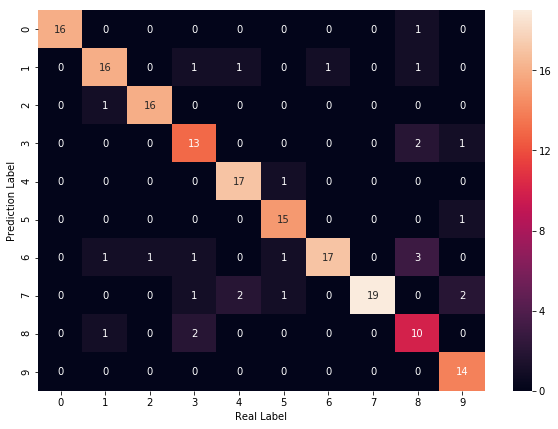

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:13 index:[1 5] real:5
#1 min_error:16 index:[1 2] real:2
#2 min_error:12 index:[8] real:8
#3 min_error:3 index:[0] real:0
#4 min_error:6 index:[1] real:1
#5 min_error:4 index:[7] real:7
#6 min_error:4 index:[6] real:6
#7 min_error:7 index:[3] real:3
#8 min_error:7 index:[2] real:2
#9 min_error:9 index:[1] real:1
#10 min_error:10 index:[7] real:7
#11 min_error:12 index:[7] real:4
#12 min_error:4 index:[6] real:6
#13 min_error:9 index:[3] real:3
#14 min_error:8 index:[1] real:1
#15 min_error:11 index:[3] real:3
#16 min_error:12 index:[7] real:9
#17 min_error:5 index:[1] real:1
#18 min_error:10 index:[7] real:7
#19 min_error:5 index:[6] real:6
#20 min_error:14 index:[0 8] real:8
#21 min_error:8 index:[4] real:4
#22 min_error:7 index:[3] real:3
#23 min_error:9 index:[1] real:1
#24 min_error:6 index:[4] real:4
#25 min_error:3 index:[0] real:0
#26 min_error:11 index:[5] real:5
#27 min_error:7 index:[3] real:3
#28 min_error:11 index:[1] real:6
#29 min_error:5 index:[9] real:9
#30

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8726035868893012
Avg Base Learner:0.8153370439084723


In [16]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.06666666666666667
Accuracy on training set: 0.1388888888888889
Accuracy on training set: 0.22777777777777777
Accuracy on training set: 0.35555555555555557
Accuracy on training set: 0.35555555555555557
Accuracy on training set: 0.38333333333333336
Accuracy on training set: 0.38333333333333336
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.55
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.6
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6444444444444445
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.7333333333333333
Accuracy on training set: 0.7111111111111111
Accuracy on training set: 0.7388888888888889
Accuracy on training set: 0.7444444444444445
Accuracy on training set: 0.7611111111111111
Accuracy on training set: 0.7777777777777778
Accuracy on training set: 0.7833333333333333
Accuracy on training set: 0.76666

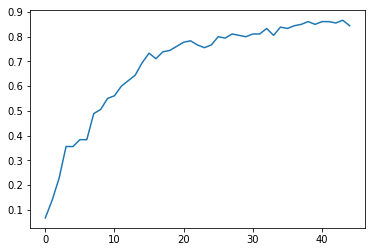

In [17]:
plt.plot(range(45),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1036 Total connections::1295
